### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Initialize variables 
results = [] 

# Number of simulations 
num_simulations = 1000000

count = 0

### repeating code to get a ton of results

In [3]:
for _ in range(num_simulations):

    doors = {
        'D1': None,
        'D2': None,
        'D3': None
    }

    random_winning_door = random.randint(1, 3) 

    match random_winning_door: 
        case 1: 
            doors['D1'] = 'W' 
            doors['D2'] = 'L' 
            doors['D3'] = 'L' 
        case 2: 
            doors['D1'] = 'L' 
            doors['D2'] = 'W' 
            doors['D3'] = 'L' 
        case 3: 
            doors['D1'] = 'L' 
            doors['D2'] = 'L' 
            doors['D3'] = 'W'

    selected_door = random.randint(1, 3)
    host_remove_door = random.randint(0, 1)

    unselected_doors = []
    selected_door_str = ''

    match selected_door:
        case 1: 
            unselected_doors = ['D2', 'D3']
            selected_door_str = 'D1'
        case 2: 
            unselected_doors = ['D1', 'D3']
            selected_door_str = 'D2'
        case 3: 
            unselected_doors = ['D1', 'D2']
            selected_door_str = 'D3'

    if host_remove_door == 0:
        if  doors[unselected_doors[0]] == 'L':
            del doors[unselected_doors[0]]
        else:
            host_remove_door = 1
            del doors[unselected_doors[1]]
    else:
        if doors[unselected_doors[1]] == 'L':
            del doors[unselected_doors[1]]
        else:
            host_remove_door = 0
            del doors[unselected_doors[0]]

    choose_change = ''
    doors_list = list(doors)

    if selected_door_str == doors_list[0]:
        choose_change = doors_list[1]
    else:
        choose_change = doors_list[0]
        
    # Record results 
    result = { 
        'Initial_Choice': 'Win' if doors[selected_door_str] == 'W' else 'Lose', 
        'Switch_Choice': 'Win' if doors[choose_change] == 'W' else 'Lose' 
    } 
    results.append(result)

    count = count + 1 

In [4]:
# Add results to a dataframe
df = pd.DataFrame(results)
# Save results to CSV 
df.to_csv('monty_hall_results.csv', index=False)
print(f'{count}\n--------------------')

print(df['Initial_Choice'].value_counts())
print('---------------------')
print(df['Switch_Choice'].value_counts())

1000000
--------------------
Initial_Choice
Lose    667036
Win     332964
Name: count, dtype: int64
---------------------
Switch_Choice
Win     667036
Lose    332964
Name: count, dtype: int64


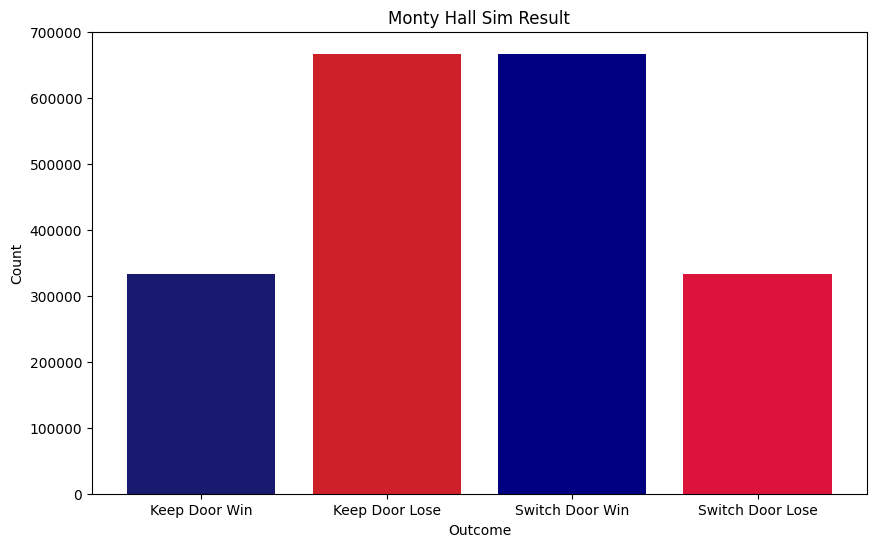

In [5]:
# Count occurrences
keep_door_counts = df['Initial_Choice'].value_counts()
switch_door_counts = df['Switch_Choice'].value_counts()

# Create bar plot
labels = ['Keep Door Win', 'Keep Door Lose', 'Switch Door Win', 'Switch Door Lose']
counts = [keep_door_counts['Win'], keep_door_counts['Lose'], switch_door_counts['Win'], switch_door_counts['Lose']]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['#191970', '#ce2029', '#000080', '#dc143c'])

# Add Labels
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Monty Hall Sim Result')

# Display the plot
plt.show()